# <center> WSI Ćwiczenie nr1 - Algorytm gradientu prostego</center>

### <center> Adam Wróblewski</center>


Celem eksperymentów jest zbadanie poprawności implementacji algorytmu gradientu prostego oraz wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych, dla 2 funkcji f(x) i g(x).

In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def function_f(x):
    return (pow(x,4))/4

In [3]:
def function_g(x):
    x1 = x[0]
    x2 = x[1]
    summand_1 = pow(math.e, (-pow(x1,2) - pow(x2, 2)))
    summand_2 = 0.5 * pow(math.e, (-pow((x1 + 1.5), 2) - pow((x2 - 2), 2)))
    g = 2 - summand_1 - summand_2
    return g

In [4]:
def gradient_f(x):
    return pow(x,3)

def gradient_g(x):
    x1 = x[0]
    x2 = x[1]
    a = 2 * x1 * pow(math.e, (-pow(x1,2) - pow(x2, 2))) + (x1 + 1.5) * pow(math.e, (-pow((x1 + 1.5), 2) - pow((x2 - 2), 2)))
    b = 2 * x2 * pow(math.e, (-pow(x1,2) - pow(x2, 2))) + (x2 - 2) * pow(math.e, (-pow((x1 + 1.5), 2) - pow((x2 - 2), 2)))
    return np.array([a, b])

In [5]:
class Solver():
    def __init__(self, step_size, iterations, start_point):
        self.step_size = step_size
        self.iterations = iterations
        self.start_point = start_point
        self.all_points = []
        self.result = []

    def get_paramethers(self):
        param_dict = {
            "step size": self.step_size,
            "iterations": self.iterations,
            "start_point": self.start_point,
        }
        return param_dict

    def solve(self, function, gradient):
        x = self.start_point
        point = [np.array(x), function(x)]
        self.all_points.append(point)
        for i in range(self.iterations):
            x = x - self.step_size * gradient(x)
            point = [np.array(x), function(x)]
            self.all_points.append(point)
        self.result = [x,function(x)]

        return [(x, function(x)), self.all_points]

In [6]:
def function_f_plot(all_points,result):
    if result is not None:
        print("Uzyskane minimum lokalne: f(","{:.8f}".format(result[0]), ") =","{:.8f}".format(result[1]))

    x_fun = np.linspace(start=-5 , stop = 5 , num=100)
    y_fun = function_f(x_fun)
    if all_points is not None and len(all_points) != 0:
        x_points = [point[0] for point in all_points]
        y_points = [point[1] for point in all_points]
        x_fun = np.linspace(start=-max(x_points) , stop = +max(x_points) , num=100)
        y_fun = function_f(x_fun)
        plt.scatter(x_points,y_points, color='red')
    plt.plot(x_fun,y_fun)
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')


In [7]:
def function_g_plot():
    x_fun = np.linspace(-4, 4, 100)
    y_fun = np.linspace(-4, 4, 100)
    X_fun, Y_fun = np.meshgrid(x_fun,y_fun)
    z_fun = function_g((X_fun,Y_fun))

    fig = plt.figure(figsize=(5,5))
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(X_fun, Y_fun, z_fun, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title("wykres g(x,y)")
    ax.view_init(30,70)
    plt.show()

In [8]:
def function_g_contour(all_points, result):
    if result is not None:
        x,y = result[0]
        print("Uzyskane minimum lokalne: f(","{:.8f}".format(result[0][0]), ",","{:.8f}".format(result[0][1]),") =","{:.8f}".format(result[1]))
    x_fun = np.linspace(-4, 4, 100)
    y_fun = np.linspace(-4, 4, 100)
    X_fun, Y_fun = np.meshgrid(x_fun,y_fun)
    Z_fun = function_g((X_fun,Y_fun))

    fig,ax = plt.subplots(1,1, figsize=(5,4))
    cp = ax.contour(X_fun,Y_fun,Z_fun,15)
    fig.colorbar(cp)
    ax.set_title('Wykres poziomicowy g(x,y)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    if all_points is not None and len(all_points) != 0:
        x_y = [point[0] for point in all_points]
        x = [point[0] for point in x_y]
        y = [point[1] for point in x_y]
        z = [point[1] for point in all_points]
        ax.scatter(x,y, color = "red", s=0.8)
    plt.show()

## Zbadanie działania algorytmu gradiantu prostego, dla funkcji f(x):

Wykres funkcji f(x):

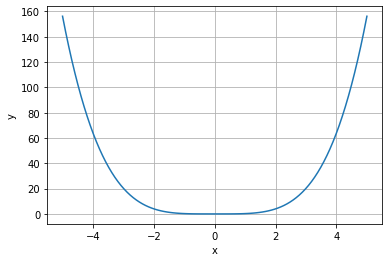

In [9]:
function_f_plot(None,None)

Funkcja f(x) posiada jedno minimum globane w punkcie (0,0)

### Zbadanie wpływu liczby iteracji na wynik algorytmu gradientu prostego:
Znalazłem wartości parametrów, dla których algorytm działa poprawnie, od tych parametrów zacznę analizę.

Uzyskane minimum lokalne: f( 0.21807753 ) = 0.00056544


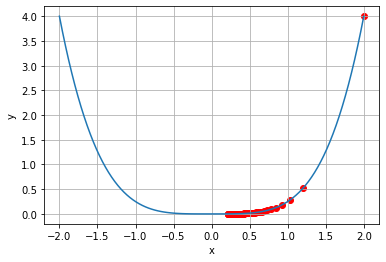

In [10]:
my_solver = Solver(step_size = 0.1, iterations = 100, start_point = 2)
my_solver.solve(function_f, gradient_f)
function_f_plot(my_solver.all_points, my_solver.result)

Dla wybranego pkt. początkowego oraz kroku algorytm gradientu prostego jest zbieżny.<br>
Minimum funkcji f(x) to punkt (0,0) zatem można powiedzieć, że minimum osiągnięte przez algorytm nie jest satysfakcjonujące - wartość argumentu jest duża w porównaniu do minimum funkcji, a także osiągnięta wartość jest zbyt duża. <br>
Aby poprawić jakosć wyników można zwiększyć liczbę iteracji. v
Zwiększam liczbę iteracji ze 100 do 1000.

Uzyskane minimum lokalne: f( 0.07047035 ) = 0.00000617


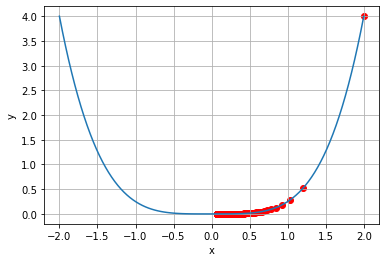

In [11]:
my_solver = Solver(step_size = 0.1, iterations = 1000, start_point = 2)
my_solver.solve(function_f, gradient_f)
function_f_plot(my_solver.all_points, my_solver.result)

Po zwiększeniu liczby iteracji 10 krotnie obserwujemy znaczną poprawę osiągniętego minimum lokalnego. Argument zmniejszył się o jedno miejsce znaczące, a wartość osiągniętego miniumum zmalała niemal 100-krotnie. <br>
Można stwierdzić, że zwiększając liczbę iteracji zwiększamy dokładność osiąganego minimum. <br>
Sprawdzam rezultat dla liczby iteracji równej 100000:

Uzyskane minimum lokalne: f( 0.00707070 ) = 0.00000000


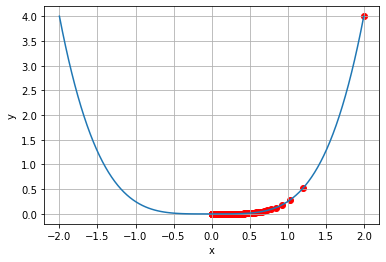

In [12]:
my_solver = Solver(step_size = 0.1, iterations = 100000, start_point = 2)
my_solver.solve(function_f, gradient_f)
function_f_plot(my_solver.all_points, my_solver.result)

Dla bardzo fużej liczby iteracji = 100 000 argument osiągniętego minimum jest wciąż spory mimo bardzo małej wartości funkcji w tym punkcie. Wynika to z charakterystyki funkcji f(x) i jej "wypłaszczenia" w okolicy minimum.

Wyniki algorytmu w zależności od liczby iteracji (Tab.1):
<br>

| liczba kroków | uzyskany argument | uzyskana wartość funkcji |
|:-------------:|:-----------------:|:------------------------:|
|      100      |    0.21807753     |        0.00056544        |
|     1000      |    0.07047035     |        0.00000617        |
|    100000     |    0.00707070     |        0.00000000        |

### Zbadanie wpływu rozmiaru kroku na minimum osiągane przez algorytm gradientu prostego przy stałym punkcie początkowym:
Liczbę iteracji ustawiam na 10 000 i zmieniam wartość długości kroku. <br>
Jako wartość referencyjną przyjmuję długość kroku = 0.1

Uzyskane minimum lokalne: f( 0.02235112 ) = 0.00000006


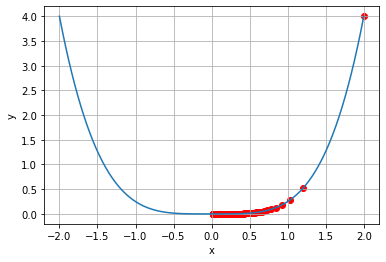

In [13]:
my_solver = Solver(step_size = 0.1, iterations = 10000, start_point = 2)
my_solver.solve(function_f, gradient_f)
function_f_plot(my_solver.all_points, my_solver.result)

Uzyskane minimum lokalne: f( 0.07064874 ) = 0.00000623


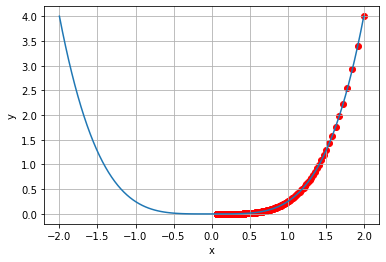

In [14]:
my_solver = Solver(step_size = 0.01, iterations = 10000, start_point = 2)
my_solver.solve(function_f, gradient_f)
function_f_plot(my_solver.all_points, my_solver.result)

Dla długości kroku równej 0.01 osięgnięte minimum jest mniej dokładne w porównaniu z tym osiągniętym prz kroku równym 0.1. <br>
Sprawdzam czy zmniejszając bardziej krok, minimum osiągane przez algorytm gradientu prostego będzie bardziej oddalone od faktycznego minimum funkcji f(x) (0,0):

Uzyskane minimum lokalne: f( 0.66661783 ) = 0.04936825


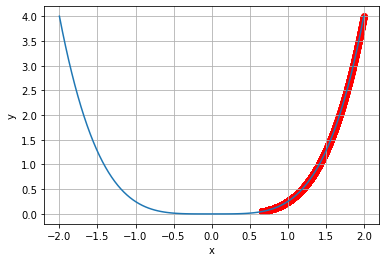

In [15]:
my_solver = Solver(step_size = 0.0001, iterations = 10000, start_point = 2)
my_solver.solve(function_f, gradient_f)
function_f_plot(my_solver.all_points, my_solver.result)

Dla kroku równego 0.0001 osiągnięte minimum jest nieakceptowalnie oddalone od punktu(0,0) będącego miniumum f(x) <br>
Zapewne zwiększenie liczby iteracji dla tak małego kroku przyniosłoby poprawę wyniku. <br>
Sprawdzam jak zachowa się algorytm zwiększając długość kroku:

Uzyskane minimum lokalne: f( 0.02235112 ) = 0.00000006


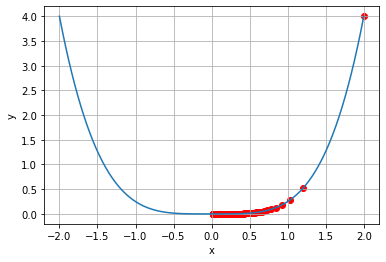

In [16]:
my_solver = Solver(step_size = 0.1, iterations = 10000, start_point = 2)
my_solver.solve(function_f, gradient_f)
function_f_plot(my_solver.all_points, my_solver.result)

Uzyskane minimum lokalne: f( 0.01579600 ) = 0.00000002


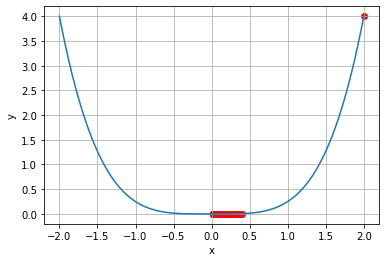

In [17]:
my_solver = Solver(step_size = 0.2, iterations = 10000, start_point = 2)
my_solver.solve(function_f, gradient_f)
function_f_plot(my_solver.all_points, my_solver.result)

Zwiększając długość kroku wyznaczone przez algorytm miniumum jest dokładniejsze - argument jak i wartość funkcji się zmniejszyły.

Uzyskane minimum lokalne: f( -0.01117552 ) = 0.00000000


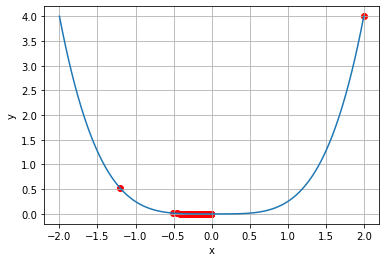

In [18]:
my_solver = Solver(step_size = 0.4, iterations = 10000, start_point = 2)
my_solver.solve(function_f, gradient_f)
function_f_plot(my_solver.all_points, my_solver.result)

Dla długości kroku 0.4 widać że algorytm "przeskoczył" minimum w pierwszym kroku. Dalsze zwiększanie długości kroku może doprowadzić do niegasnących oscylacji którch centrum jest minimum a tym samym do

Uzyskane minimum lokalne: f( 2.00000000 ) = 4.00000000


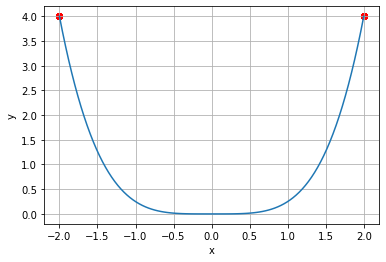

In [19]:
my_solver = Solver(step_size = 0.5, iterations = 10000, start_point = 2)
my_solver.solve(function_f, gradient_f)
function_f_plot(my_solver.all_points, my_solver.result)

Krok równy 0.5 jest zbyt duży dla poprawnego działania algorytmu przy danych warunkach początkowych. <br>

Z przeprowadzonych eksperymentów wynika, że długość kroku wpływa na dokładność osiąganego minimum. Długość Kroku jednak nie może być ani zbyt duża, bo będzie powodowała oscylacje wokół minimum, ani zbyt mała, ponieważ może się zdarzyć, że w zadanej liczbie iteracji możemy się nie udać "zbiec" do minimum. <br>

Wyniki algorytmu w zależności od długości kroku, przy stałej liczbie kroków = 10 000 (Tab.2):
<br>

| długość kroku | uzyskany argument | uzyskana wartość funkcji |
|:-------------:|:-----------------:|:------------------------:|
|    0.0001     |    0.66661783     |        0.04936825        |
|     0.01      |    0.07064874     |        0.00000623        |
|      0.1      |    0.02235112     |        0.00000006        |
|      0.2      |    0.01579600     |        0.00000002        |
|      0.4      |    -0.01117552    |        0.00000000        |
|      0.5      |      ------       |          ------          |


### Zbadanie wpływu długości kroku dla różnych pkt początkowych
Wybierzmy punkt początkowy, bardziej oddalony od minimum funkcji f(x), niech x początkowy = 5 <br>

In [20]:
# my_solver = Solver(step_size = 0., iterations = 10000, start_point = 5)
# data = my_solver.solve(function_f, gradient_f)
# function_f_plott(data[2],data[1])

Dla długości kroków > 0.2 algorytm jest rozbieżny, należy zmniejszyć długość kroku. <br>

Uzyskane minimum lokalne: f( -0.02515079 ) = 0.00000010


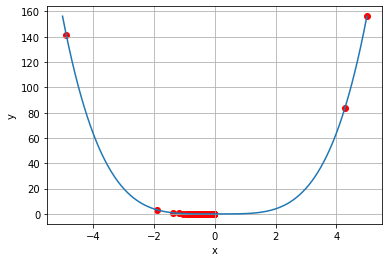

In [21]:
my_solver = Solver(step_size = 0.079, iterations = 10000, start_point = 5)
my_solver.solve(function_f, gradient_f)
function_f_plot(my_solver.all_points, my_solver.result)

Zakładając, że liczba kroków wynosi 10 000 i jest niezmienna, dla punktu początkowego x = 5 krokiem zapewniającym zbieżność algorytmu oraz najlepszą dokładność wyznaczonego minimum będzie krok o długości = 0.079(9). <br>
Dla kroków długości >= 0.08 algorytm jest rozbieżny. <br>
W celu zwiększenia dokładności wyznaczenia minimum dla pkt. początkowego = 5 możemy na przykład zwiększyć liczbę kroków. <br>

Sprawdzam, czy dla punktów początkowych bardziej oddalonych od minimum funkcji f(x) również należy zmniejszyć długość kroku alby algorytm pozostał zbieżny: <br>

In [22]:
# my_solver = Solver(step_size = 0.079, iterations = 10000, start_point = 10)
# data = my_solver.solve(function_f, gradient_f)
# function_f_plott(data[2],data[1])

Tak jak można się było domyślać dla punktu początkowego bardziej oddalonego od faktycznego minimum funkcji algorytm jest rozbieżny. <br>
Eksperymentalnie szukam granicy zbieżności algorytmu dla punktu początkowego = 10: <br>

Uzyskane minimum lokalne: f( 0.05128175 ) = 0.00000173


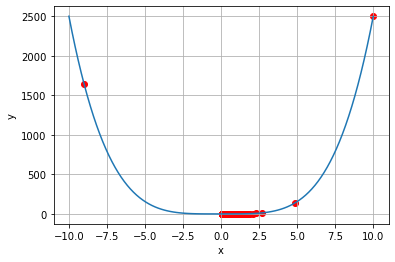

In [23]:
my_solver = Solver(step_size = 0.019, iterations = 10000, start_point = 10)
my_solver.solve(function_f, gradient_f)
function_f_plot(my_solver.all_points, my_solver.result)

Granicą zbieżności jest krok o długości 0.019(9).
<br>

Tabela przedstawiająca maksymalną długość kroku dla danego punktu początkowego przy stałej liczbie kroków = 10 000 (Tab.3):
<br>

| punkt początkowy | największy krok zapewniający zbieżność |
|:----------------:|:--------------------------------------:|
|        2         |                0.49(9)                 |
|        5         |                0.079(9)                |
|        10        |                0.019(9)                |

Analogiczne wyniki uzyskałem dla przeciwnych punktów początkowych.<br>
Wniosek: Im bardziej punkt początkowy jest oddalony od minimum funkcji, tym mniejsza musi być długość kroku, aby algorytm był zbieżny.

## Zbadanie działania algorytmu gradiantu prostego, dla funkcji f(x):
Reprezentacja graficzna funkcji g(x,y) w dwóch formach: przestrzennej i poziomicowej:

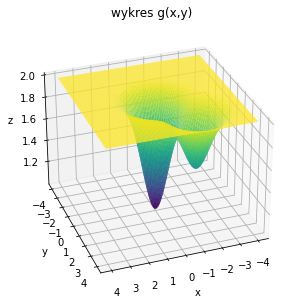

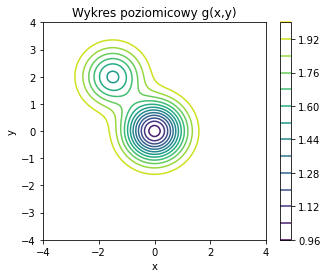

In [24]:
function_g_plot()
function_g_contour(None,None)

Funkcja g(x,y) posiada 2 minima: <br>
w punkcie (0,0) - minimum globalne o wartości ok. 1 <br>
w punkcie (-1.5,2) - minimum lokalne o wartości ok. 1.5

### Zbadanie wpływu liczby iteracji na wynik algorytmu gradientu prostego:
Znalazłem wartości parametrów, dla których algorytm działa poprawnie, od tych parametrów zacznę analizę.

Uzyskane minimum lokalne: f( 0.57515003 , 0.57822113 ) = 1.48490398


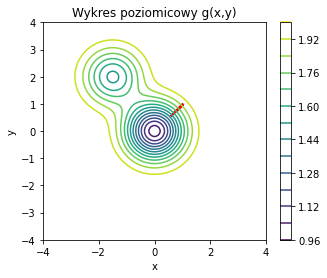

In [25]:
my_solver = Solver(step_size = 0.01, iterations = 100, start_point = (1,1))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Dla wybranego punktu początkowego algorytm jest zbieżny.<br>
Minimum funkcji g(x), do którego powinien zbiegać algorytm dla puntku początkowego (1,1) to punkt (0,0), można powiedzieć że minimum to nie zostało osiągnięte z zadowalającą dokładnością.<br>
<br>
Aby poprawić jakość wyznaczanego minimum można zwiększyć liczbę kroków / iteracji algorytmu:<br>
Zwiększam liczbę iteracji na 1000, reszta parametrów pozostaje bez zmian:<br>

Uzyskane minimum lokalne: f( -0.00146417 , 0.00195226 ) = 0.99902888


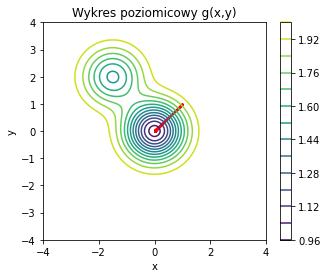

In [26]:
my_solver = Solver(step_size = 0.01, iterations = 1000, start_point = (1,1))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Zwiększenie liczby iteracji 10 krotnie przyniosło poprawę osiągniętego minimum - wartości (x,y) są o wiele bliższe wartościom (0,0) <br>
<br>
Sprawdzam czy dalsze zwiększanie liczby iteracji pozwala na dokładniejsze wyznacznie minimum funkcji g(x):<br>
Liczbę iteracji ustawiam na 10000 <br>

Uzyskane minimum lokalne: f( -0.00146418 , 0.00195225 ) = 0.99902888


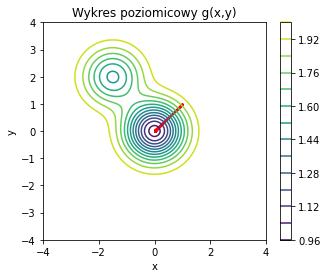

In [27]:
my_solver = Solver(step_size = 0.01, iterations = 10000, start_point = (1,1))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Wbrew oczekiwaniom zwiększenie liczby kroków w tym przypadku nie poskutkowało zmianą dokładności wyznaczenia minimum, minimum jest niemalże identyczne jak przy liczbie itearcji równej 1000. <br>
Przyczyną może być zbyt duża długość kroku, która powoduje wpadnięcie algorytmu w oscylacje w okolicy minimum. <br>

Dalsza analiza wpływu liczby kroków nie ma sensu, nie zyskujemy na dokładności, a czas potrzebny do osiągnięcia minimum znacząco wzrasta.

Można stwierdzić że zwiększając liczbę kroków algorytmu gradientu prostego zwiększamy dokładność osiąganego minimum, jednak po przekroczeniu pewnej liczby iteracji kontynuowanie obliczeń może nie mieć sensu ze względu na niewielką bądź żadną poprawę dokładności wyznaczenia minimum.

Wyniki algorytmu w zależności od liczby iteracji (Tab. 4):
<br>

| liczba kroków | uzyskany argument x | uzyskany argument y | uzyskana wartość funkcji |
|:-------------:|:-------------------:|:-------------------:|:------------------------:|
|      100      |     0.57515003      |     0.57822113      |        1.48490398        |
|     1000      |     -0.00146417     |     0.00195226      |        0.99902888        |
|     10000     |     -0.00146418     |     0.00195225      |        0.99902888        |
|     10000     |     -0.00146418     |     0.00195225      |        0.99902888        |

### Zbadanie wpływu rozmiaru kroku na minimum osiągane przez algorytm gradientu prostego przy stałym punkcie początkowym:
Liczbę iteracji ustawiam na 1000 i zmieniam wartość długości kroku. <br>
Jako wartość referencyjną przyjmuję długość kroku = 0.01: <br>
Analizę rozpoczynam od zmniejszania długości kroku. <br>

Uzyskane minimum lokalne: f( -0.00146417 , 0.00195226 ) = 0.99902888


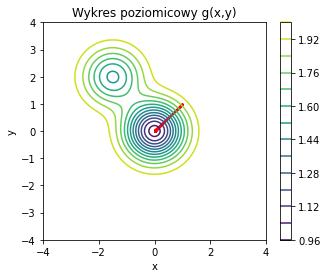

In [28]:
my_solver = Solver(step_size = 0.01, iterations = 1000, start_point = (1,1))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Analizę rozpoczynam od zmniejszania długości kroku. <br>
Dla kroku długości 0.001:

Uzyskane minimum lokalne: f( 0.57305479 , 0.57613047 ) = 1.48241754


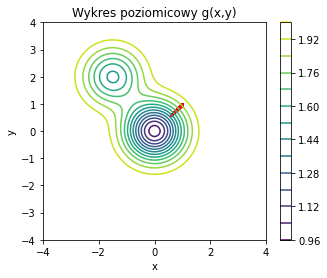

In [29]:
my_solver = Solver(step_size = 0.001, iterations = 1000, start_point = (1,1))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Dalsze zmniejszanie długości kroku może powodować oddalenie się od faktycznego munimum funkcji g(x), algorytm w zadanej liczbie kroków nie zdąży "zbiec" do minimum. <br>
Zmniejszam wartość kroku do 0.0001:

Uzyskane minimum lokalne: f( 0.97160646 , 0.97186198 ) = 1.84832044


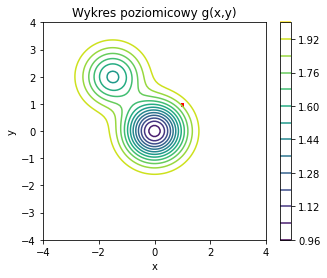

In [30]:
my_solver = Solver(step_size = 0.0001, iterations = 1000, start_point = (1,1))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Zmniejszanie długości kroku przy stałej liczbie iteracji i stałym punkcie początkowym powoduje, że algorytm mniej dokładnie wyznacza minimum funkcji g(x) - przy dostatecznie małym kroku algorytm nie jest w stanie osiągnąć miniumum z satysfakcjonującą dokładnością w zadanej liczbie iteracji. <br>

Zanim rozpocznę zwiększanie długości kroku, przedstawiam jeszcze raz wykres referencyjny dla kroku 0.01:

Uzyskane minimum lokalne: f( -0.00146417 , 0.00195226 ) = 0.99902888


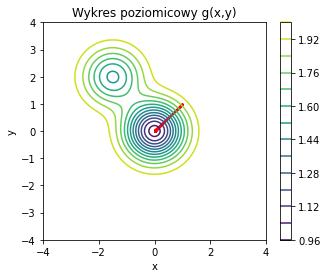

In [31]:
my_solver = Solver(step_size = 0.01, iterations = 1000, start_point = (1,1))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Dla kroku 0.1:

Uzyskane minimum lokalne: f( -0.00146418 , 0.00195225 ) = 0.99902888


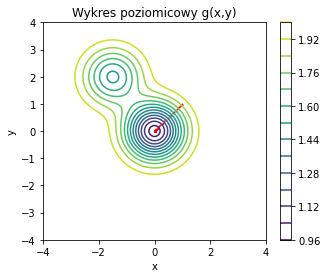

In [32]:
my_solver = Solver(step_size = 0.1, iterations = 1000, start_point = (1,1))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Dla kroku 1:

Uzyskane minimum lokalne: f( 0.02371456 , 0.02083631 ) = 1.00001993


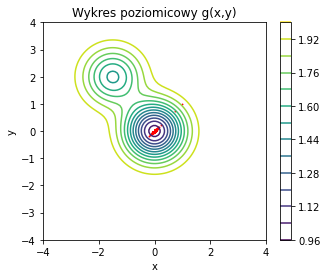

In [33]:
my_solver = Solver(step_size = 1, iterations = 1000, start_point = (1,1))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Zwiększanie kroku w tym przypadku nie powoduje znacznej zmiany dokładności wyznaczenia minimum. <br>
Dla kroku 2:

Uzyskane minimum lokalne: f( -0.80763907 , -0.60267892 ) = 1.63742581


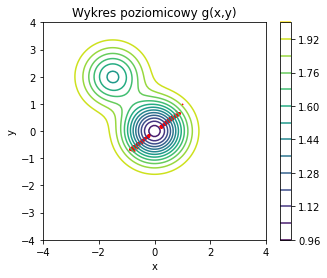

In [34]:
my_solver = Solver(step_size = 2, iterations = 1000, start_point = (1,1))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Dla długości kroku równej 2 obserwujemy oscylacje wokół minimum funkcji g(x) - algorytm dla takiego kroku jest rozbieżny. <br>
Dalsze zwiększanie długości kroku będzie powodwać większe oscylacje. <br>
Dla kroku 10:

Uzyskane minimum lokalne: f( -5.39965698 , -5.35341863 ) = 2.00000000


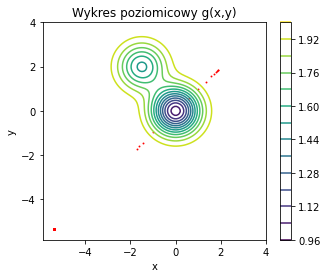

In [35]:
my_solver = Solver(step_size = 10, iterations = 1000, start_point = (1,1))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Wyniki algorytmu w zależności od długości kroku (Tab. 5):
<br>

| długość kroku | uzyskany argument x | uzyskany argument y | uzyskana wartość funkcji |
|:-------------:|:-------------------:|:-------------------:|:------------------------:|
|    0.0001     |     0.97160646      |     0.97186198      |        1.84832044        |
|     0.001     |     0.57305479      |     0.57613047      |        1.48241754        |
|     0.01      |     -0.00146417     |     0.00195226      |        0.99902888        |
|      0.1      |     -0.00146418     |     0.00195225      |        0.99902888        |
|       1       |     0.02371456      |     0.02083631      |        1.00001993        |
|       2       |     -0.80763907     |     -0.60267892     |        1.63742581        |
|      10       |     -5.39965698     |     -5.35341863     |        2.00000000        |

Z przeprowadzonych eksperymentów możemy stwierdzić, że długość kroku wpływa na dokładność osiaganego minimum. Krok jednak nie może być ani zbyt duży, bo będzie powodował oscylacje wokół minimum, ani zbyt mały, ponieważ może się zdarzyć, że w zadanej liczbie iteracji możemy się nie udać "zbiec" do minimum.


### Zbadanie wpływu długości kroku dla różnych pkt początkowych

Można się spodziewać, że w zależności od wybranego punktu początkowego oraz kroku będzie zależała zbieżność algorytmu, oraz że zależnie od wybranego punktu początkowego algorytm raz zakończy pracę w punkcie (0,0) a raz w (-1.5, 2) - wynika to z faktu, że algorytm gradientu prostego znajduje minima lokalne.

Analizę zacznę od punktu (1,1) i kroku 0.8:

Uzyskane minimum lokalne: f( -0.00146418 , 0.00195225 ) = 0.99902888


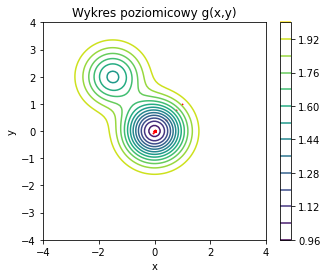

In [36]:
my_solver = Solver(step_size = 0.8, iterations = 1000, start_point = (1,1))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Dla takich parametrów algorytm działa bardzo dobrze i poprawnie wyznacza minimum funkcji. <br>
Sprawdzam, co się stanie, jeśli oddalimy się bardziej od punktu (0,0) będącego minimum. <br>
Niech punkt początkowy będzie równy (3,3)

Uzyskane minimum lokalne: f( 1.57110020 , 1.57537724 ) = 1.99288433


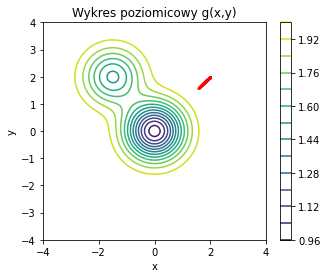

In [37]:
my_solver = Solver(step_size = 0.1, iterations = 1000, start_point = (2,2))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Dla punktu początkowego (0,0) i kroku 0.1 algorytm nie osiąga minimum w zadanej liczbie iteracji. Problemem jest zbyt mała długość kroku, oraz fakt że w zadanym punkcie początkowym wartość gradientu jest bardzo mała zw względu na wypłaszczenie funkcji. <br>
Zwiększam długość kroku:


Uzyskane minimum lokalne: f( -0.02676626 , -0.01702431 ) = 1.00002966


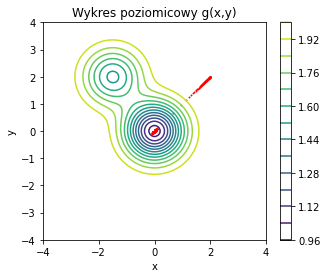

In [38]:
my_solver = Solver(step_size = 1, iterations = 1000, start_point = (2,2))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Po zwiększeniu kroku 10 krotnie udaje się osiągnąć minimum funkcji. <br>
Sprawdzę, czy jeśli jeszcze bardziej oddalę punkt początkowy od minimum, to długość kroku równa 1 będzie niewystarczająca, aby osiągnąć minimum.

Uzyskane minimum lokalne: f( 2.99999060 , 2.99999080 ) = 1.99999998


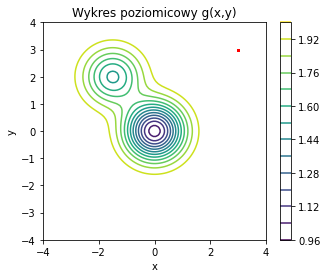

In [39]:
my_solver = Solver(step_size = 0.1, iterations = 1000, start_point = (3,3))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Zgadza się, dla punktu (3,3) długość kroku jest zbyt mała, należy ją zwiększyć, aby osiągnąć minimum.

Zmieniam punkt początkowy, aby sprawdzić zachowanie algorytmu w innym obszarze dziedziny.<br>
Dla punktu (-4, 4) iu kroku długości 1:

Uzyskane minimum lokalne: f( -3.85278144 , 3.88222515 ) = 1.99994295


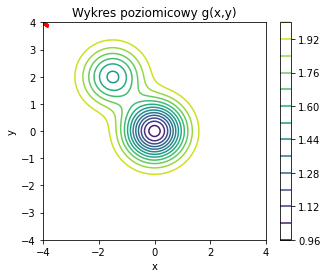

In [40]:
my_solver = Solver(step_size = 1, iterations = 1000, start_point = (-4,4))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Dla punktu początkowego (-4, 4) długość kroku równa 1 jest zbyt mała, aby osiągnąć minimum. <br>
Zwiększam długość kroku do 3:

Uzyskane minimum lokalne: f( -2.00581779 , 1.60799696 ) = 1.66666667


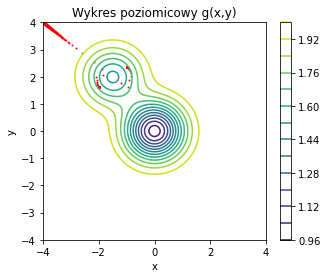

In [41]:
my_solver = Solver(step_size = 3, iterations = 1000, start_point = (-4,4))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Dla punktu początkowego (-4, 4) długość kroku równa 3 jest zbyt duża - obswerujemy oscylacje wokół minimum lokalnego. <br>
Należy zmniejszyć długość kroku, aby algorytm był zbieżny. <br>
Zmieniam długość kroku na 1.6.

Uzyskane minimum lokalne: f( -1.49393320 , 1.99191045 ) = 1.49802076


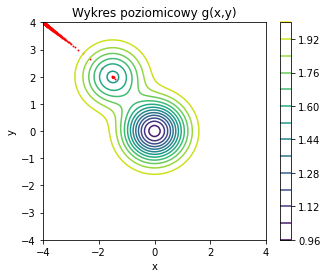

In [42]:
my_solver = Solver(step_size = 1.6, iterations = 1000, start_point = (-4,4))
my_solver.solve(function_g, gradient_g)
function_g_contour(my_solver.all_points, my_solver.result)

Długość kroku 1.6 jest optymalna dla punktu początkowego (-4, 4). Algorytm osiąga minimum lokalne z zadowalającą dokładnością w zadanej liczbie kroków.<br>
Warto zaznaczyć, że dla punktu (-4, 4) osiągnęliśmy inne minimum niż dla punktu (1,1), (2,2) oraz (3,3) wynika to z własności gradientu - gradient wskazuje na najszybszy wzrost lub spadek wartości funkcji.

# Wnioski ogólne
Alogrytm Gradientu prostego ma kilka wad i podczas używania go należy zwrócić uwagę na zadane hiperparametry. <br><br>
Znalezienie minimum oraz jego dokładność przy pomocy algorytmu gradientu prostego zależy od punktu początkowego, liczby iteracji, długości funkcji, a także charakterystyki funckcji, której minimum chcemy znaleźć. <br>
<br>
W zależności od wybranego punktu początkowego algorytm może znajdować różne minima lokalne. Ponadto, jeśli punkt początkowy będzie zbyt oddalony od minimum, liczba iteracji będzie zbyt mała i długość kroku będzie niewielka, może się zdarzyć, że algorytm nie zdąży "zbiec" / "osiągnąć" minimum. Jeśli natomiast długość kroku będzie zbyt duża, mogą pojawić się oscylacje wokół miniumum, a tym samym algorytm nie będzie zbieżny.
<br><br>Podczas posługiwania się algorytmem gradientu prostego warto również zwrócić uwagę na kombinację liczby iteracji/ kroków i długości kroku - możemy ustawić mały krok, aby algorytm był zbieżny i nie wpadał w oscylacje, jednak jednocześnie musimy ustawić dużą liczbę iteracji, co może skutkować długim czasem symulacji. <br><br>
Aby skutecznie znaleźć minimum posługując się tym algorytmem należy przeprowadzić kilka, kilkanaście symulacji, z różnymi parametrami.